Hello User! This is a HousePricePrediction project!
The model is trained using the linear regression method.
Which estimate of error would you like to use? Type Exactly as shown:
R Squared Score: 0.6195131796544892
What types of graphics would you like to see? Type Exactly as shown:


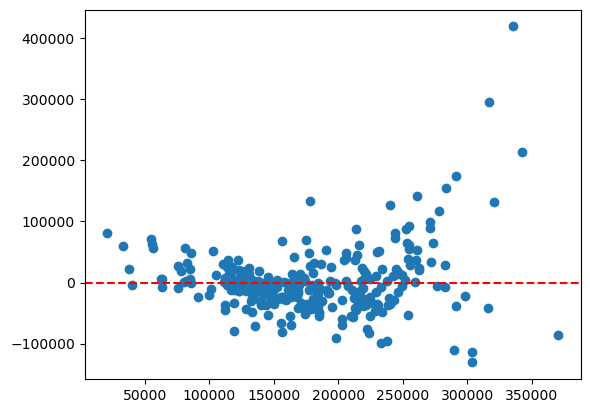

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score,mean_absolute_error, mean_absolute_percentage_error
dataset=pd.read_excel("HousePricePrediction.xlsx")
Train_Data=dataset[dataset['SalePrice'].notnull()].copy()
Predict_Data=dataset[dataset['SalePrice'].isnull()].copy()
Train_Data.drop("Id",axis=1, inplace=True)
numeric_cols=Train_Data.select_dtypes(include=[np.number]).columns
Train_Data[numeric_cols]=Train_Data[numeric_cols].fillna(Train_Data[numeric_cols].median())
categorical_cols = Train_Data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    Train_Data[col] = Train_Data[col].fillna(Train_Data[col].mode()[0])
Train_Data=pd.get_dummies(Train_Data)
X=Train_Data.drop("SalePrice", axis=1)
Y=Train_Data[["SalePrice"]]
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=.2,random_state=42)
model=LinearRegression()
model.fit(X_Train,Y_Train)
Y_Pred=model.predict(X_Test)
print("Hello User! This is a HousePricePrediction project!")
print("The model is trained using the linear regression method.")
Error_Estimate=""
while Error_Estimate !="MAE"and Error_Estimate !="MAPE" and Error_Estimate !="RMSE" and Error_Estimate !="R2Score":
    print("Which estimate of error would you like to use? Type Exactly as shown:")
    Error_Estimate=input("MAE, MAPE, RMSE, R2Score")
if (Error_Estimate=="MAE"):
    Mean_Absolute_Error=mean_absolute_error(Y_Test,Y_Pred)
    print(f"Mean Absolute Error: {Mean_Absolute_Error}")
if (Error_Estimate=="MAPE"):
    Mean_Absolute_Percentage_Error=mean_absolute_percentage_error(Y_Test,Y_Pred)
    print(f"Mean Absolute Percentage Error: {Mean_Absolute_Percentage_Error}")
if (Error_Estimate=="RMSE"):
    Root_Mean_Squared_Error=root_mean_squared_error(Y_Test,Y_Pred)
    print(f"Root Mean Squared Error: {Root_Mean_Squared_Error}")
if (Error_Estimate=="R2Score"):
    R_Squared_score=r2_score(Y_Test,Y_Pred)
    print(f"R Squared Score: {R_Squared_score}")
Graphic=""
while Graphic !="CorrelationHeatMap"and Graphic !="ActualVsPredictedPriceScatterPlot" and Graphic !="ResidualPlot" and Graphic !="DistributionPlot":
    print("What types of graphics would you like to see? Type Exactly as shown:")
    Graphic=input("CorrelationHeatMap, ActualVsPredictedPriceScatterPlot, ResidualPlot, DistributionPlot")
if (Graphic=="CorrelationHeatMap"):
    plt.figure(figsize=(12,10))
    sns.heatmap(Train_Data.corr()[["SalePrice"]].sort_values(by='SalePrice', ascending=False),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
    plt.title("Correlation with Sale Price")
    plt.show()
if (Graphic=="ActualVsPredictedPriceScatterPlot"):
    plt.scatter(Y_Test,Y_Pred)
    plt.plot([Y_Test.min(),Y_Test.max()],[Y_Test.min(),Y_Test.max()],'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Model Accuracy")
    plt.show()
if (Graphic=="ResidualPlot"):
    plt.scatter(Y_Pred, Y_Test.values.flatten()-Y_Pred.flatten())
    plt.axhline(y=0, color="r",linestyle="--")
    plt.show()
if (Graphic=="DistributionPlot"):
    sns.histplot(Train_Data["SalePrice"],kde=True)
    plt.title("Distribution of Sale Prices")
    plt.show()